# Score Difference between DecisionTreeRegressor & RandomForestRegressor
### This notebook is a case study in which we can learn the actual difference in using the DecissionTree and RandomForest algorithm.

### Project Prerequisites

In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

### Preparing the Data

In [2]:
train_df = pd.read_csv("Data/train.csv")
test_df = pd.read_csv("Data/test.csv")

In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
features = ["LotArea","YrSold"]
X = train_df[features]

In [5]:
y = train_df.SalePrice

In [6]:
test_df2 = test_df[["LotArea","YrSold"]]

In [30]:
X_train, X_test,y_train,y_test = train_test_split(X,y)

## DecisionTreeRegressor()

In [7]:
model1 = DecisionTreeRegressor()

In [8]:
model1.fit(X_train,y_train)

DecisionTreeRegressor()

In [35]:
decision_tree_predictions = model1.predict(test_df2)
decision_tree_predictions

array([131500., 256300., 140000., ..., 274970., 239900., 135000.])

In [10]:
decision_tree_df = pd.DataFrame(data=decision_tree_predictions)
decision_tree_df.head()

,0
0,131500.0
1,256300.0
2,140000.0
3,160000.0
4,230000.0


In [11]:
decision_tree_df = decision_tree_df.rename(columns = {0:"SalePrice"})
decision_tree_df["LotArea"] = test_df["LotArea"]
decision_tree_df["YrSold"] = test_df["YrSold"]
decision_tree_df.head()

,SalePrice,LotArea,YrSold
0,131500.0,11622,2010
1,256300.0,14267,2010
2,140000.0,13830,2010
3,160000.0,9978,2010
4,230000.0,5005,2010


## RandomForestRegressor()

In [12]:
model2 = RandomForestRegressor()

In [13]:
model2.fit(X,y)

RandomForestRegressor()

In [14]:
random_forest_predictions = model2.predict(test_df2)
random_forest_predictions

array([142815.        , 254703.72      , 246154.31      , ...,
       309007.44      , 216651.41666667, 149014.50793651])

In [15]:
random_forest_df = pd.DataFrame(data=random_forest_predictions)
random_forest_df.head()

,0
0,142815.000000
1,254703.720000
2,246154.310000
3,185296.948333
4,192230.000000


In [16]:
random_forest_df = random_forest_df.rename(columns = {0:"SalePrice"})
random_forest_df["LotArea"] = test_df["LotArea"]
random_forest_df["YrSold"] = test_df["YrSold"]
random_forest_df.head()

,SalePrice,LotArea,YrSold
0,142815.000000,11622,2010
1,254703.720000,14267,2010
2,246154.310000,13830,2010
3,185296.948333,9978,2010
4,192230.000000,5005,2010


### Plotting the SalePrice of RandomForestValues and DecisionTreeValues

In [17]:
Dt_plt = decision_tree_df["SalePrice"].head()
Rf_plt = random_forest_df["SalePrice"].head()

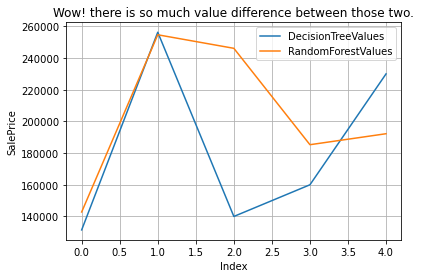

In [18]:
plt.plot(Dt_plt,label = "DecisionTreeValues")
plt.plot(Rf_plt,label = "RandomForestValues")
plt.title("Wow! there is so much value difference between those two.")
plt.xlabel("Index")
plt.ylabel("SalePrice")
plt.grid()
plt.legend()
plt.show()

### This above graph concludes that both alogorithms have a decent amount of differences between them.In the next case study i may calculate the mean absolute error for both the algorithms to find which is more acurate. Thank you - Adi (: